Koden nedanför ska uppfylla 

In [ ]:
import control as ct
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def plot_system(a = 1, b = 1):
    H_1 = ct.tf([0, 0, a**2], [1, b * a, a ** 2])
    H_2 = ct.tf([0, a, 0], [1, b * a, a ** 2])
    H_3 = ct.tf([1, 0, 0], [1, b * a, a ** 2])
    systems = [H_1, H_2, H_3]
    titles = ["H1", "H2", "H3"]

    fig, axes = plt.subplots(3, 3, figsize=(15, 12))

    # --- Pol-noll ---
    for i, (sys, title) in enumerate(zip(systems, titles)):
        ct.pzmap(sys, plot=True, ax=axes[0, i])
        axes[0, i].set_title(f"Pol–noll karta för {title}")

    # --- Impulssvar ---
    for i, (sys, title) in enumerate(zip(systems, titles)):
        t, y = ct.impulse_response(sys)
        axes[1, i].plot(t, y)
        axes[1, i].grid(True)
        axes[1, i].set_title(f"Impulssvar för {title}")
        axes[1, i].set_xlabel("Tid [s]")
        axes[1, i].set_ylabel("Amplitude")

    # --- Bode ---
    omega = np.logspace(-4, 4, 500)
    for i, (sys, title) in enumerate(zip(systems, titles)):
        s = 1j * omega
        H_jw = sys(s)
        mag = 20 * np.log10(np.abs(H_jw))
        phase = np.angle(H_jw, deg=True)

        ax_mag = axes[2, i]
        ax_phase = ax_mag.twinx()

        ax_mag.semilogx(omega, mag, 'b')
        ax_mag.set_ylabel("Magnitude [dB]", color='b')
        ax_mag.set_xlabel("Frekvens [rad/s]")
        ax_mag.grid(True, which="both")

        ax_phase.semilogx(omega, phase, 'r--')
        ax_phase.set_ylabel("Fas [°]", color='r')

        ax_mag.set_title(f"Bode-diagram för {title}")

    plt.tight_layout()
    plt.show()

# Skapa interaktiva sliders
interact(plot_system,
         a=widgets.FloatSlider(value=1, min=0.001, max=100, step=0.001),
         b=widgets.FloatSlider(value=1, min=0.001, max=100, step=0.001))


interactive(children=(FloatSlider(value=1.0, description='a', min=0.001, step=0.001), FloatSlider(value=1.0, d…

<function __main__.plot_system(a=1, b=1)>

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact

def plot_system(a = 1, b = 1):
    H_1 = signal.lti([0, 0, -a**2], [1, b * a, a ** 2])
    H_2 = signal.lti([0, -a, 0], [1, b * a, a ** 2])
    H_3 = signal.lti([-1, 0, 0], [1, b * a, a ** 2])
    systems = [H_1, H_2, H_3]
    titles = ["H1", "H2", "H3"]

    fig, axes = plt.subplots(3, 3, figsize=(15, 12))

    # --- Pol-noll ---
    for i, (sys, title) in enumerate(zip(systems, titles)):
        p = sys.poles
        z = sys.zeros
        axes[0, i].scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='b', s=100, label='Nollor')
        axes[0, i].scatter(np.real(p), np.imag(p), marker='x', color='r', s=100, label='Poler')
        axes[0, i].set_title(f"Pol–noll karta för {title}")

    # --- Impulssvar ---
    for i, (sys, title) in enumerate(zip(systems, titles)):
        t, y = signal.impulse(sys)
        axes[1, i].plot(t, y)
        axes[1, i].grid(True)
        axes[1, i].set_title(f"Impulssvar för {title}")
        axes[1, i].set_xlabel("Tid [s]")
        axes[1, i].set_ylabel("Amplitude")

    # --- Bode ---
    omega = np.logspace(-4, 4, 500)
    for i, (sys, title) in enumerate(zip(systems, titles)):
        w, mag, phase = signal.bode(sys)

        ax_mag = axes[2, i]
        ax_phase = ax_mag.twinx()

        ax_mag.semilogx(w, mag, 'b')
        ax_mag.set_ylabel("Magnitude [dB]", color='b')
        ax_mag.set_xlabel("Frekvens [rad/s]")
        ax_mag.grid(True, which="both")

        ax_phase.semilogx(w, phase, 'r--')
        ax_phase.set_ylabel("Fas [°]", color='r')

        ax_mag.set_title(f"Bode-diagram för {title}")

    plt.tight_layout()
    plt.show()

# Skapa interaktiva sliders
interact(plot_system,
         a=widgets.FloatSlider(value=1, min=0.001, max=100, step=0.001),
         b=widgets.FloatSlider(value=1, min=0.001, max=100, step=0.001))


interactive(children=(FloatSlider(value=1.0, description='a', min=0.001, step=0.001), FloatSlider(value=1.0, d…

<function __main__.plot_system(a=1, b=1)>

4.
Ration R_2 och R_3 påverkar om poolerna är reela eller inte. Om man tittar på LP-filtret H1 så blir den mer likt ett Chebychev filter där man skapar en spik i slutet för att få ner amplituden extra fort.

Ration GRC ändrar hastigheten på impulssvaret vilket i sin tur gör att man förflyttar vilka frekvenser filtren verkar på.

5.
H1 är ett LP-filter
H2 är ett BP-filter
H3 är ett HP-filter

6.

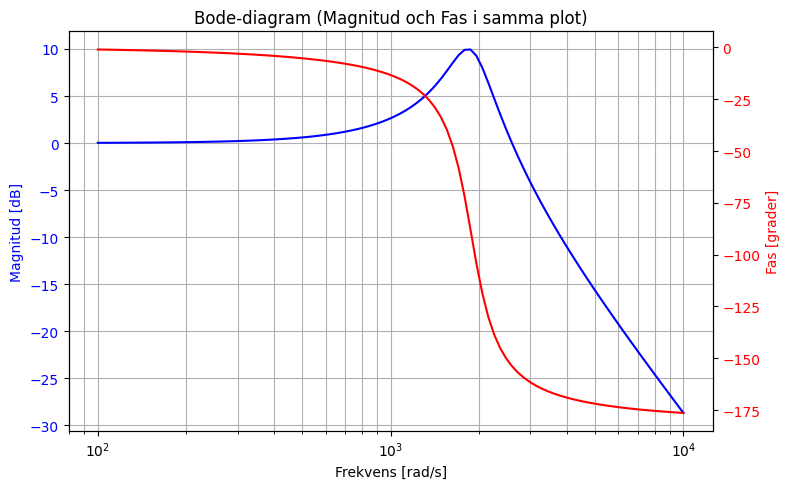

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


a = 600 * np.pi # Denna behöver räknas ut
b = 0.32 # Denna är uträknad 1 / (2 * c * np.sqrt(1 - c ** 2)), b = 2c
H_1 = signal.lti([0, 0, a**2], [1, b * a, a ** 2])
w, mag, phase = signal.bode(H_1)


# Rita både magnitud och fas i samma figur
fig, ax1 = plt.subplots(figsize=(8, 5))

# Magnitud på vänster y-axel
ax1.semilogx(w, mag, 'b', label='Magnitud [dB]')
ax1.set_xlabel("Frekvens [rad/s]")
ax1.set_ylabel("Magnitud [dB]", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, which='both')

# Fas på höger y-axel
ax2 = ax1.twinx()
ax2.semilogx(w, phase, 'r', label='Fas [°]')
ax2.set_ylabel("Fas [grader]", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Bode-diagram (Magnitud och Fas i samma plot)")
plt.tight_layout()
plt.show()

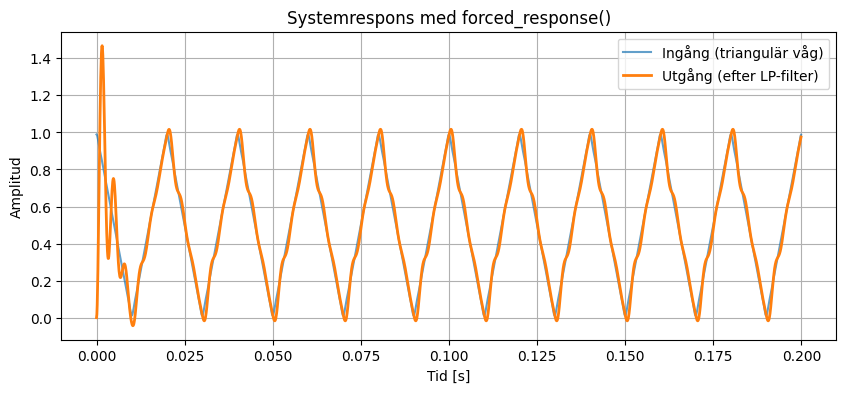

In [21]:
# Uppgift 7

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal


# 1. Grundparametrar
f_0 = 100         # grundfrekvens [Hz]
T_0 = 1 / f_0     # period [s]
fs = 10000    # samplingsfrekvens [Hz]
t = np.arange(0, 20*T_0, 1/fs)   # simulera 5 perioder
h = 1             # amplitud


a = 1930 # Denna behöver räknas ut och är idag en gissning
b = 0.32 # Denna är uträknad 1 / (2 * c * np.sqrt(1 - c ** 2)), b = 2c
H_1 = signal.lti([a**2], [1, b * a, a ** 2]) # I nuläget är det ett inverterande lp-filter

# 2. Definiera Fourierserie för triangulär våg
def triangel_term(n, t, L):
    return 1 / (2 * n - 1) ** 2 * np.cos((2 * n - 1) * np.pi * t / L)

def triangelvåg(t, h, L, N=9):
    # N = antal termer i Fourierserien (ju fler, desto mer "ideal")
    return h / 2 + 4 * h / np.pi ** 2 * sum(triangel_term(n, t, L) for n in range(1, N+1))

# 3. Skapa signal
u = triangelvåg(t, h, T_0, N=9)

tout, yout, xout = signal.lsim(H_1, U=u, T=t)

# 5. Plotta resultatet
plt.figure(figsize=(10, 4))
plt.plot(t, u, label="Ingång (triangulär våg)", alpha=0.7)
plt.plot(tout, yout, label="Utgång (efter LP-filter)", linewidth=2)
plt.xlabel("Tid [s]")
plt.ylabel("Amplitud")
plt.title("Systemrespons med forced_response()")
plt.legend()
plt.grid(True)
plt.show()
